### 학습 목표
- KAGGLE 경진대회에서 높은 순위를 차지하는 것!!!
- 탑승객의 정보를 바탕으로 생존/사망자 예측
- 머신러닝 학습의 전체 과정에 대한 실습
    - 문제 정의
    - 데이터 수집 ( KAGGLE 에서 다운로드 )
    - 탐색적 데이터 분석(EDA) - 데이터를 알아보는 것 (시각화)
    - 데이터 전처리
        - 오타 수정, 결측치/이상치 처리
        - encoding(인코딩) - 범주형 -> 수치형
        - bining(그룹핑) - 수치형 -> 범주형
        - 정규화/scaling - 값들을 일정 범위로 축소하는 과정 (분산을 줄이는 과정)
        - 편향 제거
    - 모델 선택 및 학습
        - 모델 생성
        - 특성 선택
        - 하이퍼 파라미터 튜닝 (매개변수 조절)
        - 훈련데이터와 평가데이터로 분리 - 과소적합/과대적합 유무를 확인할 수 있음
            - 과소적합 : 둘 다 정확도가 낮으면 과소적합
                - 특성이 너무 적어서, 데이터가 너무 적어서, 학습이 너무 적어서
            - 과대적합 : 훈련과 테스트의 차이가 큰 것, 훈련데이터의 정확도가 더 높음
                - 특성이 너무 많아서, 데이터가 너무 적어서, 학습을 너무 많이해서
    - 평가 : 생성된 모델을 validation 데이터(새로운 데이터)로 평가

### 문제 정의
- 머신러닝의 전체과정을 실습
- 타이타닉 데이터에 포함된 데이터의 의미를 분석
- 테스트 데이터로 생존/사망 예측

### 데이터 수집

In [1]:
import pandas as pd

train = pd.read_csv("./data/titanic_train.csv", index_col="PassengerId")
test = pd.read_csv("./data/titanic_test.csv", index_col="PassengerId")

In [2]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


### 탐색적 데이터 분석 - 데이터 확인

In [3]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 컬럼값들의 특징

<table border=0 align=left width=700>
  <tr><th>feature<th width=200>의미<th width=300>설명<th> 타입
  <tr><td>Survivied<td>생존여부<td>target 라벨 (0 : 사망, 1 : 생존)<td>integer
  <tr><td>Pclass<td>티켓의 클래스<td>1 = 1등석, 2 = 2등석, 3 = 3등석<td>integer
  <tr><td>Name<td>이름<td>호칭과 이름으로 구성<td>string
  <tr><td>Sex<td>성별<td>male, female로 구분<td>string    
  <tr><td>Age<td>나이<td>0-80세<td>integer
  <tr><td>SibSp<td>함께 탑승한 형제와 배우자의 수<td><td>integer
  <tr><td>Parch<td>함께 탑승한 부모, 아이의 수<td><td>integer
  <tr><td>Ticket<td>티켓 번호<td>alphabat + integer<td>integer
  <tr><td>Fare<td>탑승료<td><td>float
  <tr><td>Cabin<td>객실 번호<td>alphabat + integer<td>string
  <tr><td>Embarked<td>탑승 항구<td>C = Cherbourg, Q = Queenstown, S = Southampton<td>string
</table>    

In [4]:
# 데이터 세부 구성 확인 - 결측치 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
# 결측치 개수 확인 - True인 경우는 1이므로 더하면 결측치 갯수를 알 수 있음
train.isnull()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
887,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,True,False,False,False,False,True,False


In [6]:
# 수치 데이터의 기술통계를 확인(결측치, 분산, 이상치, 편향)
# 결측치 - count를 보면 됨
# 분산 - mean과 std - 평균(mean)보다 더 큰 표준편차(std)를 가진 것이 분산이 큰 것
# 이상치 - 최소값min 25% 최대값max 75% 에서 확인
# 편향 - mean과 50% 차이가 큰 경우 편향된 것
        # Fare - mean 32.204, 50% 14.454 편향됨을 알 수 있음
# std - 표준편차
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 데이터 전처리 & EDA

#### 결측치 처리
- 수정(채우기)
    - 기술통계(평균, 중앙값)
    - 다른 칼럽과 비교해서 해당 값으로 변경
    - 가장 많은 값으로 변경
    - 결측치만 따로 다른값으로 설정
- 삭제
    - 텍스트마이닝에서 주로 삭제 사용
    - 데이터가 충분히 많은 경우에도 삭제
    - 감탄사 같은 것들

#### 나이의 결측치 채우기 - 다른 컬럼의 통계값을 활용
- 비교 칼럼은 나이 컬럼과 상관관계가 높은 칼럼을 활용
- 비교 칼럼은 범주형 데이터인 컬럼을 활용
- 사용할 컬럼 : Pclass, Sex

In [7]:
# 상관관계 분석 - corr()
# 연속형(숫자로 표현 가능한) 데이터에 대해서만 상관관계 분석이 가능하다.
# 절대값이 1에 가까울수록 상관관계가 높음
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
# 피벗 테이블을 활용해서 그룹핑
# values : 결측치를 채우고자 하는 컬럼명
# index : 참고하고자 하는 컬럼명을 리스트로 나열
# aggfunc : 참고하고자 하는 컬럼의 값들 계산하는 방법
pt1 = train.pivot_table(values='Age', index=['Pclass','Sex'], aggfunc='mean')

In [9]:
pt1

Age
Pclass Sex              
1      female  34.611765
       male    41.281386
2      female  28.722973
       male    30.740707
3      female  21.750000
       male    26.507589

In [10]:
# 피벗 테이블 접근 방법
pt1.loc[1,"female"]

Age    34.611765
Name: (1, female), dtype: float64

In [11]:
import numpy as np

# 결측치 채우기 함수
def fillAge(row):
    # 넘어온 데이터에서 Age 컬럼이 결측치라면
    if np.isnan(row['Age']):
        # 비어있다 -> 피벗 테이블을 검색해서 해당 값을 넣어줌
        return pt1.loc[row['Pclass'],row['Sex']]
    # 넘어온 데이터에서 Age컬럼이 결측치가 아니라면
    else:
        return row['Age']

In [12]:
# apply() 함수를 이용해서 결측치 채우기
# 특정 열 또는 특정 행에 함수를 적용

# train.apply() : 한 줄 데이터가 함수로 넘어감
# axis = 1 : 행 단위로 데이터를 넘긴다
# astype('int64') : 실수로 된 나이 평균값을 정수로 변환해서 저장
train['Age'] = train.apply(fillAge, axis=1).astype("int64")

In [13]:
train.head(6)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,26,0,0,330877,8.4583,NaN,Q


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [16]:
test['Age'] = test.apply(fillAge, axis=1).astype("int64")

In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### 훈련 데이터의 Embarked 결측치 채우기
- 결측치 개수가 적은 경우
    - 범주형 데이터의 결측치는 가능하면 많은 개수를 가진 클래스에 포함
        - 개수가 많은 쪽에 포함시켜야 원래 클래스에 영향을 덜 줌
- 결측치 개수가 데이터 수만큼 많은 경우
    - 새로운 클래스 값으로 할당
    - 원래 클래스의 비율벼로 쪼개서 랜덤으로 할당

In [18]:
# embarked 컬럼의 클래스 종류 확인
train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
# embarked 컬럼의 클래스별 데이터 수 확인
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
# embarked 컬럼의 결측치 수 확인
train['Embarked'].isnull().sum()

2

In [21]:
# 결측치가 2개, 최빈값(S)으로 결측치를 채움
# 전체 결측치 한번에 채우는 함수 -> fillna()
train['Embarked'] = train['Embarked'].fillna('S')

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


#### Fare 결측치 채우기 - test데이터

In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


In [24]:
# 등급에 따라 Fare 값이 확연히 다름
# ㄴ> 이상치가 큼
# 중앙값을 사용해서 결측치 채우기 - median
# Pclass, Sex
pt2 = test.pivot_table(values='Fare', index=['Pclass','Sex'], aggfunc='median')
pt2

Fare
Pclass Sex             
1      female  79.02500
       male    51.86250
2      female  26.00000
       male    13.00000
3      female   8.08125
       male     7.89580

In [25]:
# 등급, 성별 확인을 위해 결측치가 있는 행을 확인
test[test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60,0,0,3701,NaN,NaN,S


In [26]:
# 결측치 채우기 - fillna()
test['Fare'] = test['Fare'].fillna(7.8958)

In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 35.9+ KB


#### Cabin 결측치 채우기
- 객실번호 영문자(층) + 숫자로 구성
- 객실번호 범주형데이터인데 클래스 수가 너무 많고 클래스별 데이터 개수는 대부분 1
    - 객실번호를 유사한 그룹으로 그룹핑 해주어야 함
- 그룹핑의 기준은 영문자(층)이 생존/사망에 영향을 미치는 주요 데이터로 고려


In [28]:
train['Cabin'].isnull().sum()

687

In [29]:
test['Cabin'].isnull().sum()

327

In [30]:
# 객실번호의 결측치는 실제 객실 없는 경우일거라고 판단하여 새로운 클래스 M 할당
train['Cabin'] = train['Cabin'].fillna('M')
test['Cabin'] = test['Cabin'].fillna('M')

In [31]:
# 각 값들의 첫번째 영문자만 잘라서 저장
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

In [32]:
train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [33]:
train['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

### 데이터 시각화(EDA)
- 그래프 그리기
- train 데이터를 이용해 탐색

#### 범주형 데이터 시각화
- 빈도 기반의 bar chart 많이 활용

##### Cabin 시각화
- seaborn 라이브러리 활용

In [34]:
import seaborn as sns

<AxesSubplot:xlabel='Cabin', ylabel='count'>

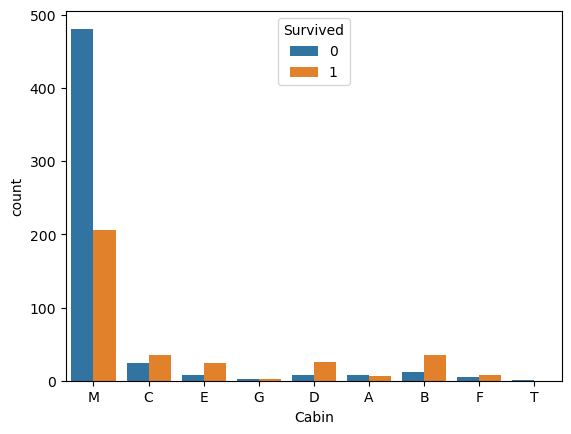

In [36]:
sns.countplot(data = train, x='Cabin', hue='Survived')

- M에서 상대적으로 많은 사망자가 분포해있다. 모델에게 학습을 시켜봐도 의미가 있을 것 같다!

##### Pclass 시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

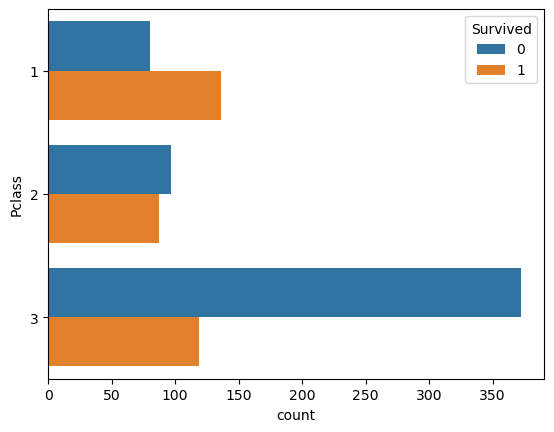

In [37]:
sns.countplot(data=train, y='Pclass', hue='Survived')

- 1등급에 탑승하면 생존확률이 더 높다.
- 3등급에 탑승하면 사망확률이 더 높다.
- Pclass를 모델 학습에 사용해도 괜찮을 것 같다.

##### Pclass와 Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

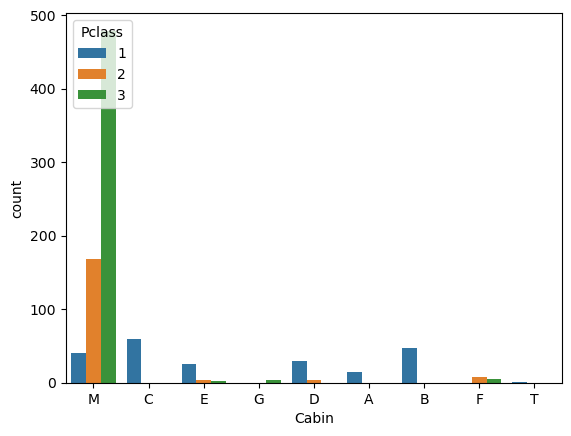

In [38]:
sns.countplot(data=train, x='Cabin', hue='Pclass')

- A, B, C는 1등급 탑승객들이 있다.
- M은 3등급 탑승객이 많다. -> 3등급 탐승객들이 많이 사망해서 정보가 손실된걸까?

<AxesSubplot:xlabel='Sex', ylabel='count'>

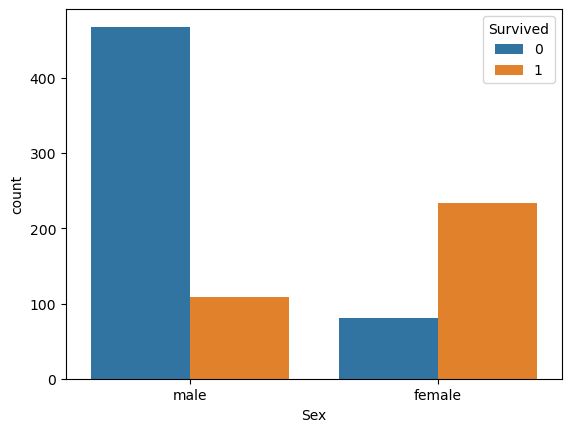

In [39]:
sns.countplot(data=train,
              x='Sex',
              hue='Survived')

#### 수치형 데이터
- 구간을 나눠서 종합하는 히스토그램
- 커널밀도추정 그래프

In [40]:
import matplotlib.pyplot as plt

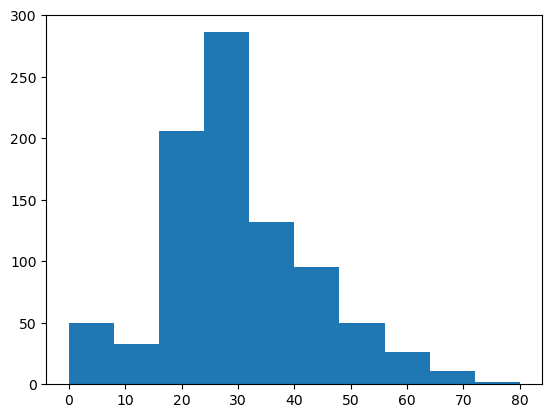

In [44]:
plt.hist(train['Age'])
plt.show()

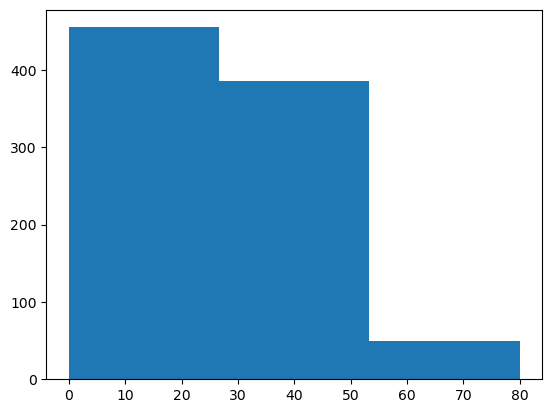

In [43]:
plt.hist(train['Age'], bins=3)
plt.show()

##### Age 시각화

<AxesSubplot:xlabel='Sex', ylabel='Age'>

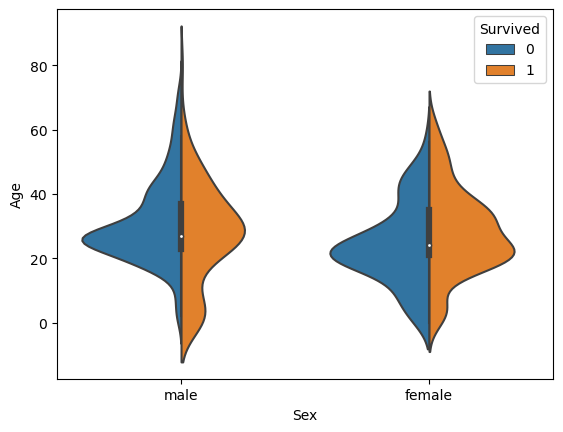

In [46]:
sns.violinplot(data=train, y='Age', x='Sex', hue='Survived', split=True)

- 남성은 20대가 조금 더 많이 사망
- 어린아이 중에서는 남자아이가 여자아이보다 상대적으로 생존 확률이 높다. (시대적 배경?)

##### Fare 시각화

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

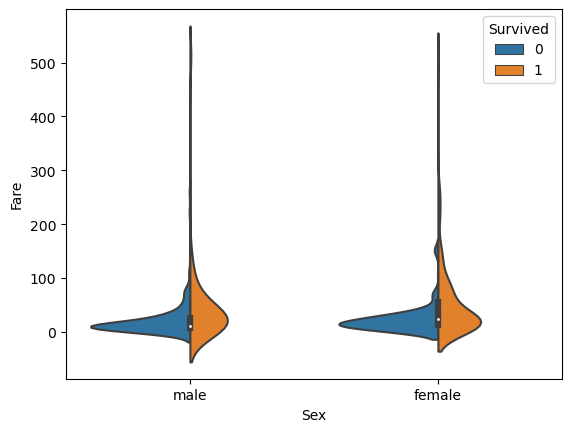

In [47]:
sns.violinplot(data=train, y='Fare', x='Sex', hue='Survived', split=True)

- 낮은 요금을 지불한 탑승객들이 많이 사망했다.
- 전체 요금이 0~40달러 사이에 많이 분포되어있다.

#### 특성공학
- SibSp, Parch를 합쳐서 가족이라는 새로운 컬럼 생성

In [48]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C


In [51]:
train['SibSp']

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    1
890    0
891    0
Name: SibSp, Length: 891, dtype: int64

In [52]:
train['Parch']

PassengerId
1      0
2      0
3      0
4      0
5      0
      ..
887    0
888    0
889    2
890    0
891    0
Name: Parch, Length: 891, dtype: int64

In [53]:
train['SibSp'] + train['Parch']

PassengerId
1      1
2      1
3      0
4      1
5      0
      ..
887    0
888    0
889    3
890    0
891    0
Length: 891, dtype: int64

In [54]:
# 가족의 수 ( 새 컬럼 생성 )
train['Family_Size'] = train['SibSp'] + train['Parch'] + 1

In [55]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2


In [57]:
test['Family_Size'] = test['SibSp'] + test['Parch'] + 1

In [58]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1


<AxesSubplot:xlabel='Family_Size', ylabel='count'>

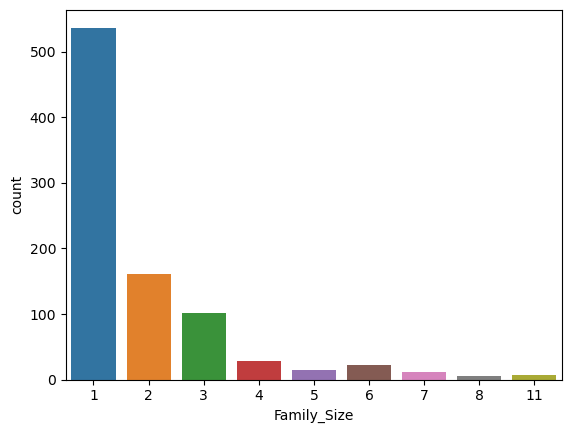

In [60]:
sns.countplot(data=train,
              x='Family_Size')

- 1명일 경우 사망자가 훨씬 많다
- 2~4명일 경우 생존자가 조금 더 많다
- 5명 이상일 경우 사망자가 더 많다
- Family_Size라는 수치 데이터를 그대로 사용할 수도 있지만, 범주형 데이터로 변환시켜보자!
- Binning(수치형 -> 범주형) : 사소한 관찰 오류를 줄일 수 있음(모델의 단순화 유도)

#### 특성공학
- Family_Size가 1이면 Alone, 2~4이면 Small, 5명 이상이면 Large 범주로 변경
- cut 함수 활용

In [61]:
bins = [0, 1, 4, 20]                  # 구간
labels = ['Alone', 'Small', 'Large']  # 구간 별 범주 이름
train['Family_Group'] = pd.cut(x = train['Family_Size'], bins = bins, labels = labels)

In [62]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small


In [63]:
test['Family_Group'] = pd.cut(x = test['Family_Size'], bins = bins, labels = labels)

In [64]:
test.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,M,Q,1,Alone
